In [ ]:
''' 
Aparencia: sol, chuva, nublado
temperatura: -130 ~ 130 F
umidade: 0 ~ 100
jogar: sim/nao

tratar valores NAs
'''

In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts


In [2]:
data_set = pd.read_csv('tempo.csv', sep=';')

data_set.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
agrupado = data_set.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

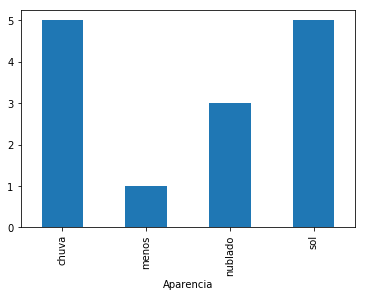

In [4]:
agrupado.plot.bar()

In [5]:
agrupado = data_set.groupby(['Temperatura']).size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

Text(0.5, 1.0, 'Temperatura')

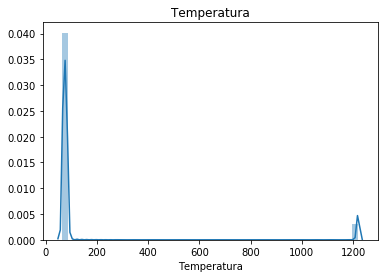

In [6]:
srn.distplot(data_set['Temperatura']).set_title('Temperatura')

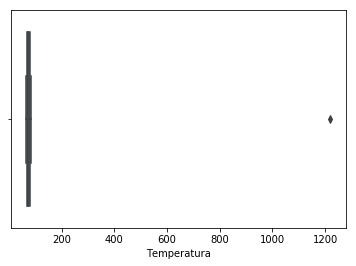

In [7]:
srn.boxplot(data_set['Temperatura'])

In [8]:
agrupado = data_set.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

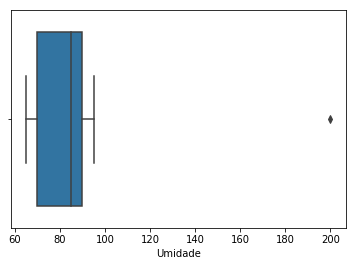

In [9]:
srn.boxplot(data_set['Umidade'])

In [10]:
agrupado = data_set.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [11]:
agrupado = data_set.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [12]:
data_set.isnull().sum()    ##verificar existencia de valores Nulos (NAs)

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

''' Arrumando os dados '''

In [13]:
data_set['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [14]:
mediana = sts.median(data_set['Temperatura'])
mediana

73.5

In [15]:
data_set.loc[(data_set['Temperatura']) > 130]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [16]:
data_set.loc[(data_set['Temperatura']) < -130]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [17]:
data_set.loc[(data_set['Temperatura'] > 130), 'Temperatura'] = mediana

In [18]:
data_set.loc[(data_set['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [20]:
data_set['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [21]:
##COnsertando valores da Umidade

data_set['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [22]:
data_set.loc[(data_set['Umidade']) > 100]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [23]:
mediana = sts.median(data_set['Umidade'])
mediana

85.5

In [24]:
data_set.loc[(data_set['Umidade']) > 100] = mediana
data_set['Umidade'].describe()

count    13.000000
mean     80.961538
std       9.896257
min      65.000000
25%      70.000000
50%      85.000000
75%      90.000000
max      95.000000
Name: Umidade, dtype: float64

In [38]:
print('Qtd. nulos: ', data_set['Umidade'].isnull().sum()) #verifica exstencia de valors nulos em UMIDADE
data_set.loc[(data_set['Umidade']).isnull()] #visualiza qual o valor que contem valor nulo

Qtd. nulos:  1


,Aparencia,Temperatura,Umidade,Vento,Jogar
3,chuva,70.0,NaN,FALSO,sim


In [40]:
mediana = sts.median(data_set['Umidade']) 
data_set['Umidade'].fillna(mediana, inplace=True)  #coloca a mediana no valor NA
print('valores nulos: ', data_set['Umidade'].isnull().sum())
data_set.loc[(data_set['Umidade']).isnull()] #visualiza qual o valor que contem valor nulo

valores nulos:  0


,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
#Consertando os valores de aparencia 

print(data_set.groupby(['Aparencia']).size())
print('Moda: ', sts.mode(data_set['Aparencia']))


In [ ]:
#Substituindo valor (categorico)
data_set.loc[data_set['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
data_set.groupby(['Aparencia']).size()

In [ ]:
##Arrumando valores de Vento

data_set['Vento'].isnull().sum()
